# 4.19.x Final Assignment

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

### Part 1

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [2]:
file = pd.read_csv ("food_consumption.csv")
food = pd.DataFrame(file)

In [3]:
food

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96
...,...,...,...,...
1425,Bangladesh,dairy,21.91,31.21
1426,Bangladesh,wheat,17.47,3.33
1427,Bangladesh,rice,171.73,219.76
1428,Bangladesh,soybeans,0.61,0.27


1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?** 

In [ ]:
food.groupby('food_category', as_index=False).consumption.describe().sort_values('50%', ascending=False).round(2).head(1)

2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

In [7]:
df=pd.DataFrame()
df['food_category'] = food.groupby('food_category', as_index=False).co2_emission.describe()['food_category']
df['IQR'] = food.groupby('food_category', as_index=False).co2_emission.describe()['75%'] - food.groupby('food_category', as_index=False).co2_emission.describe()['25%']
df.sort_values('IQR', ascending=False).head(1)

,food_category,IQR
0,beef,399.3775


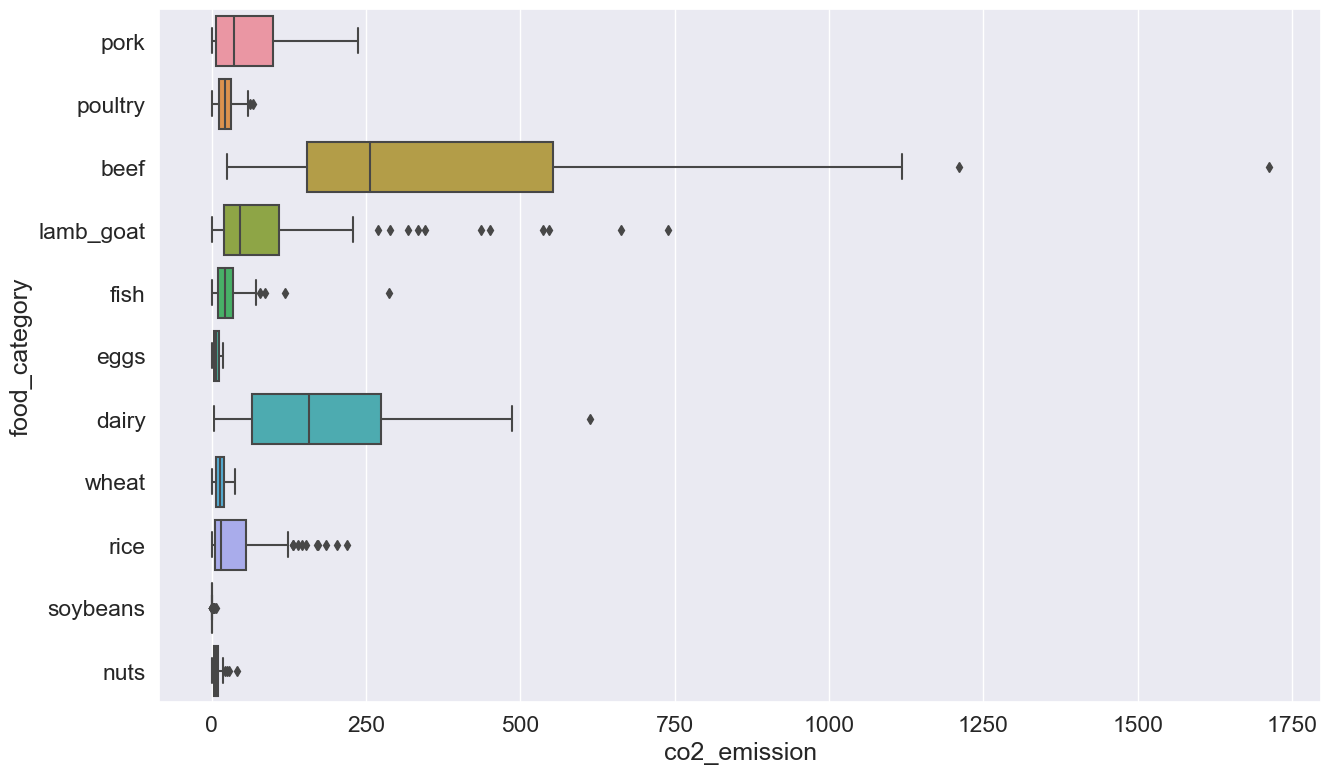

In [10]:
sns.boxplot( x='co2_emission', y='food_category', data=food)
plt.show()

3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value? 

In [11]:
food.groupby('food_category', as_index=False).co2_emission.describe().sort_values('50%', ascending=False).head(1)

,food_category,count,mean,std,min,25%,50%,75%,max
0,beef,130.0,374.102,297.90671,24.07,154.215,255.655,553.5925,1712.0


4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why. 

In [12]:
treatment = food[food['food_category']=='poultry']['consumption']
control = food[food['food_category']=='fish']['consumption']
mu_treatment = np.mean(treatment)
mu_control = np.mean(control)
mu_diff = mu_treatment - mu_control
print(mu_treatment, mu_control, mu_diff)

21.21923076923077 17.28707692307692 3.9321538461538488


In [13]:
df = pd.DataFrame({'group': ['treatment' if el <= len(treatment) else 'control' for el in range(1,(len(treatment)*2)+1)], 
                   'responses': pd.concat([treatment, control])}).reset_index()

In [14]:
n = 20000
mu_diff_samples = []
for i in range(n): 
    # extract a subsample of 50% of data without replacement
    df_sample1 = df.sample(frac=0.5, replace=False)
    # use set() to get indexes of rows that were not extracted from df in previous step
    ix2 = set(df.index) - set(df_sample1.index)
    # create dataframe with other 50% of data
    df_sample2 = df.iloc[list(ix2)]
    # calculate difference in mean from each sample
    mu_diff_temp = np.mean(df_sample1['responses']) - np.mean(df_sample2['responses'])
    # append sampled mean difference to mu_diff_samples list
    mu_diff_samples.append(mu_diff_temp)

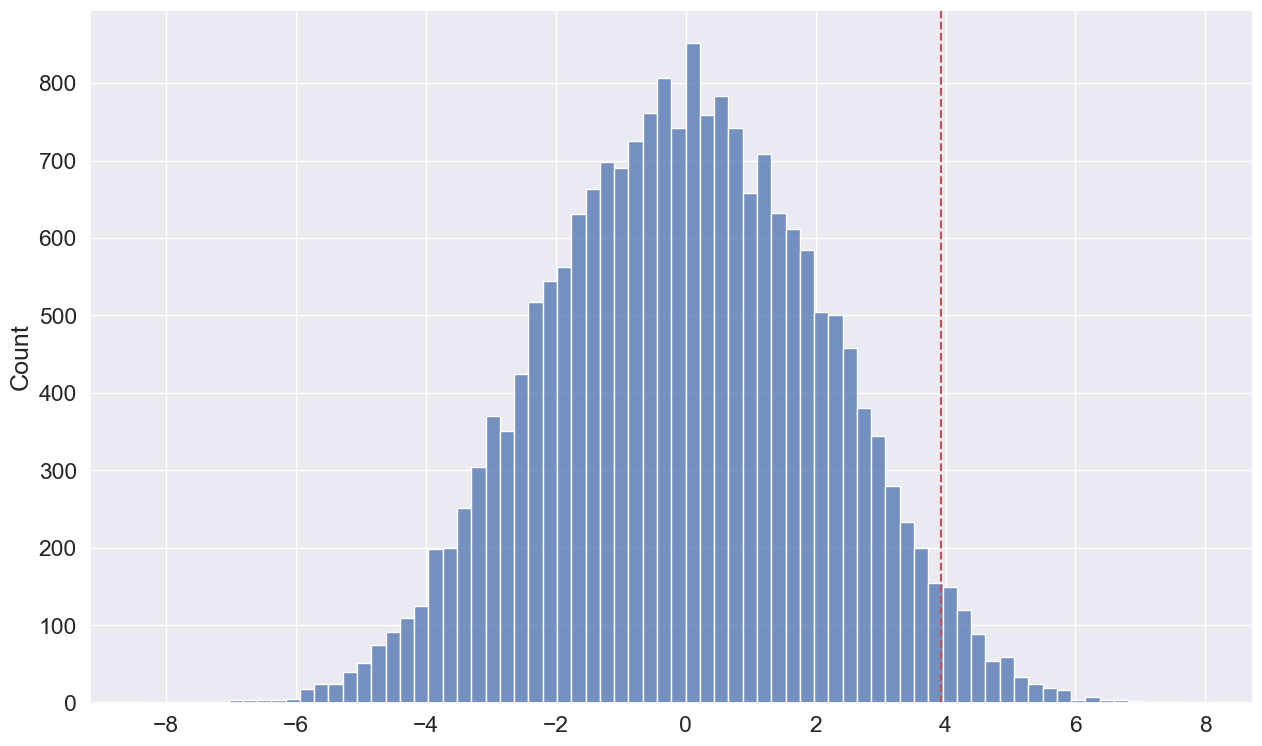

mu_diff: 3.93


In [15]:
sns.histplot(mu_diff_samples)
plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
plt.show()
print('mu_diff:', round(mu_diff, 2))

In [16]:
p_value = sum(mu_diff_samples>mu_diff)/n
print(f"p-value: {p_value: .2%}")
alpha = 0.05
if p_value <= alpha: 
    print('p-value <= alpha | the observed result is statistically significant | H0 rejected')
else: 
    print('p-value > alpha | the observed result is not statistically significant | H0 accepted')

p-value:  3.02%
p-value <= alpha | the observed result is statistically significant | H0 rejected


### Part 2

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Load and save the dataset to a DataFrame object named `happy`. As always, familiarise yourself with its contents. 

In [17]:
file2 = pd.read_csv ("world_happiness.csv")
happy = pd.DataFrame(file2)

In [ ]:
happy

In [ ]:
happy.describe()

5. Using a histogram, plot the distribution of the `happiness_score` variable, **which distribution does it resemble?** *(in the answer sheet write the [name of the distribution](https://miro.medium.com/max/962/1*DmPUIjvecL7KllOamoFSDw.png) that best fits the data)* 

distribuzione bimodale

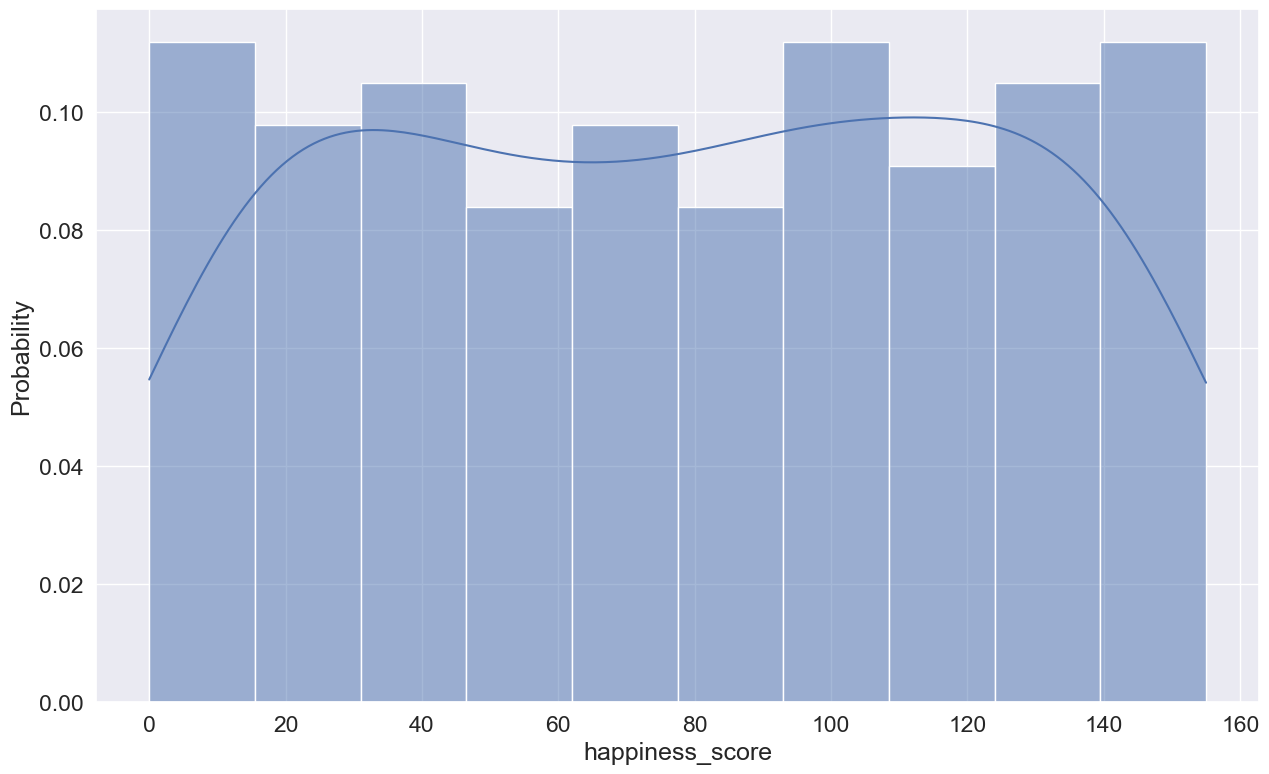

In [15]:
sns.histplot(happy['happiness_score'], bins=10, stat='probability', kde=True )
plt.show()

6. Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?** 

In [21]:
happy.drop('country', axis=1).corr()

,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
social_support,1.000000,0.470893,0.154848,0.449225,-0.687268,-0.705512,-0.824702
freedom,0.470893,1.000000,0.387234,0.493207,-0.444420,-0.388856,-0.567582
corruption,0.154848,0.387234,1.000000,0.305043,-0.335716,-0.135665,-0.215308
generosity,0.449225,0.493207,0.305043,1.000000,-0.531636,-0.433144,-0.499259
gdp_per_cap,-0.687268,-0.444420,-0.335716,-0.531636,1.000000,0.701955,0.727973
life_exp,-0.705512,-0.388856,-0.135665,-0.433144,0.701955,1.000000,0.780225
happiness_score,-0.824702,-0.567582,-0.215308,-0.499259,0.727973,0.780225,1.000000


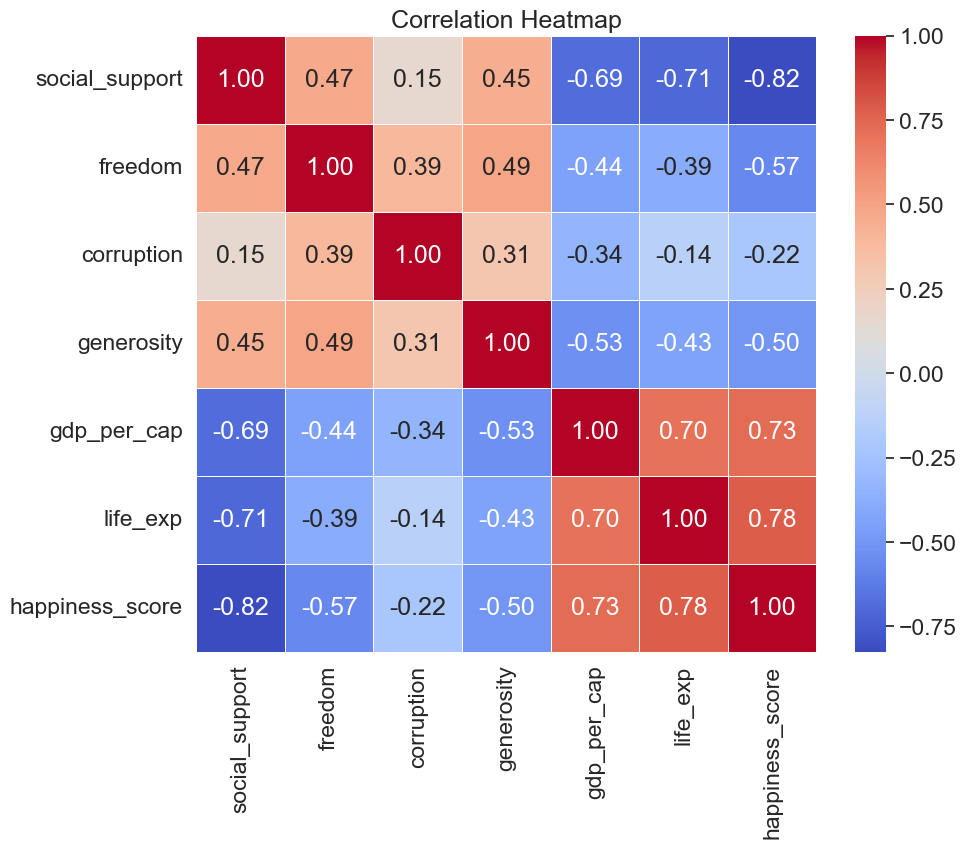

In [22]:
# Calcola la matrice di correlazione
correlation_matrix = happy.drop('country', axis=1).corr()

# Crea la "heatmap" di correlazione
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

7. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*. 

In [23]:
happy['corruption'].isnull().value_counts()

corruption
False    135
True       8
Name: count, dtype: int64

In [24]:
happy.loc[ happy['corruption'].isnull() ]

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
20,United Arab Emirates,72.0,4.0,NaN,15.0,65700,73.6,135
26,Saudi Arabia,62.0,68.0,NaN,82.0,48100,77.1,128
27,Qatar,NaN,NaN,NaN,NaN,113000,80.5,127
35,Bahrain,59.0,24.0,NaN,23.0,42000,79.8,119
47,Kuwait,69.0,47.0,NaN,42.0,64100,83.3,105
78,Turkmenistan,8.0,83.0,NaN,33.0,17600,70.3,69
84,China,108.0,31.0,NaN,133.0,17100,77.5,63
91,Jordan,88.0,88.0,NaN,118.0,8350,79.6,55


In [ ]:
happy_fill = happy.copy()
happy_fill = happy_fill.fillna( happy_fill.drop('country', axis=1).mean() )
happy_fill


In [26]:
happy_fill['corruption'].isnull().value_counts()

corruption
False    143
Name: count, dtype: int64

8. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**. 

In [27]:
import statsmodels.api as sm

In [49]:
Y = happy_fill['happiness_score']
X = happy_fill['life_exp']
X = sm.add_constant(X)
model = sm.OLS( Y, X )
results = model.fit()

In [50]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     219.4
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.59e-30
Time:                        12:41:40   Log-Likelihood:                -683.97
No. Observations:                 143   AIC:                             1372.
Df Residuals:                     141   BIC:                             1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -298.8710     25.536    -11.704      0.000    -349.355    -248.387
life_exp       5.1021      0.344     14.812      0.000       4.421       5.783
==============================================================================
Omnibus:                        7.539   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.120
Skew:                          -0.408   Prob(JB):                       0.0469
Kurtosis:                       2.400   Cond. No.                         778.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
def lin_reg_coef(x, y): 
    
    # calculate the means of the X and Y variables
    X_mean = np.mean(x)
    Y_mean = np.mean(y)
    
    # calculate the deviations from the mean of each data point (for X and Y)
    X_mean_dev = [el-X_mean for el in x]
    Y_mean_dev = [el-Y_mean for el in y]
    
    # calculate the covariance between X and Y and the variance of X
    XY_covar = np.sum(np.array(X_mean_dev) * np.array(Y_mean_dev))
    X_var = np.sum(np.array(X_mean_dev)**2)
    
    # calculate the slope (b_1) and intercept (b_0) coefficients
    b_1 = XY_covar/X_var
    b_0 = Y_mean - b_1*X_mean
    
    return b_0, b_1

In [31]:
intercept, slope = lin_reg_coef( x=happy_fill['life_exp'], y=happy_fill['happiness_score'])

print('Intercept:', intercept)
print('Slope:', slope)

Intercept: -298.8710186716581
Slope: 5.102062529735628


In [83]:
# Oppure più semplicemente:
intercept = results.params.const
slope = results.params.life_exp
print('Intercept:', intercept)
print('Slope:', slope)

Intercept: -298.87101867165825
Slope: 5.102062529735629


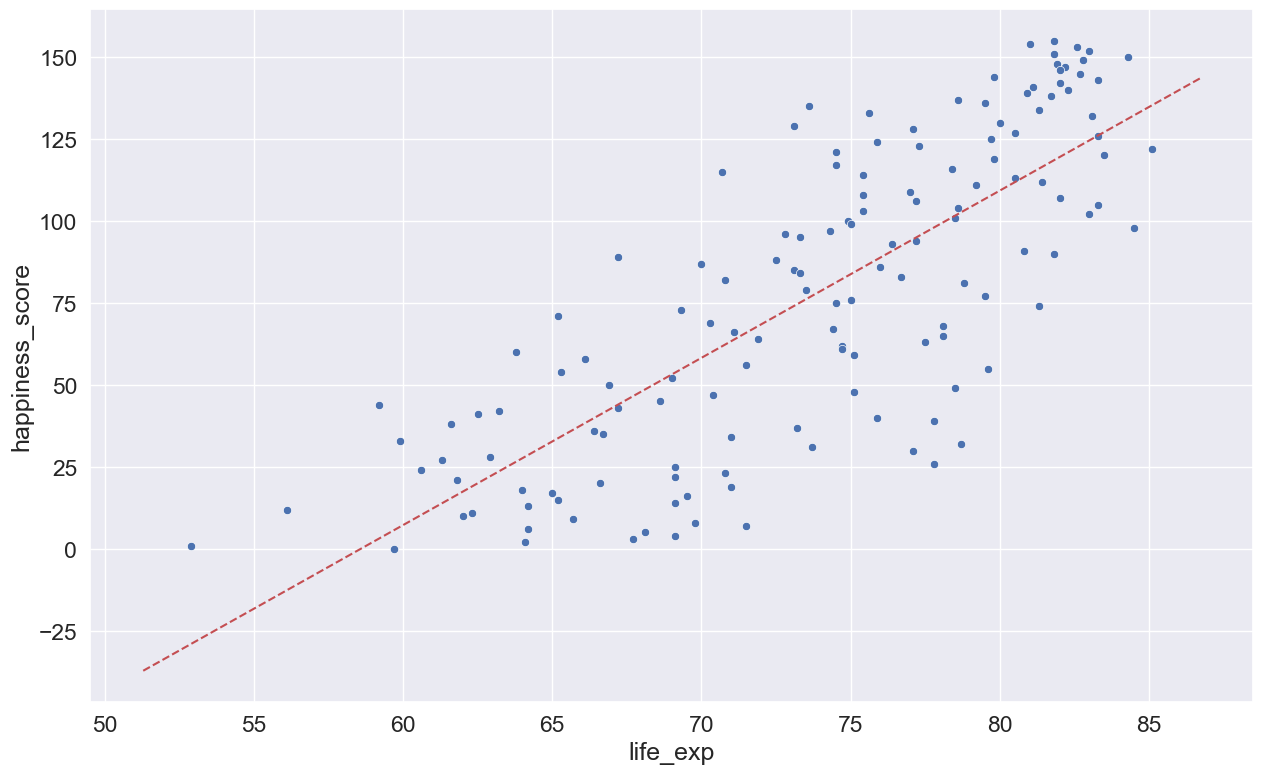

In [32]:
# plot the data points using a scatter plot
sns.scatterplot(x=happy_fill['life_exp'], y=happy_fill['happiness_score'], data=happy_fill)

axes = plt.gca()   # get axes instance of current figure
x_vals = np.array(axes.get_xlim())   # get x-axis limits
y_vals = intercept + slope * x_vals   # define the equation of the regression line
plt.plot(x_vals, y_vals, '--', color='r')   # draw the regression line on top of the scatter plot
plt.show()

l' aumento corrisponde allo slope, cioè 5.1 punti per 1 anno in più

9. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, train a linear regression model where you try to predict the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(use a `random_state=42`)*. Calculate the R-squared on the train set and compare it with the R-squared based on the test set. **Would you say that the model is overfitting the training data?** Motivate your answer. 

In [33]:
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.metrics as srm

In [ ]:
sns.pairplot(happy_fill.drop('country', axis=1))
plt.show()

In [35]:
happy_fill.drop('country', axis=1).corr()

,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
social_support,1.000000,0.470893,0.153112,0.449225,-0.635651,-0.703274,-0.821384
freedom,0.470893,1.000000,0.379438,0.493207,-0.411042,-0.387622,-0.565298
corruption,0.153112,0.379438,1.000000,0.296768,-0.292755,-0.133278,-0.211122
generosity,0.449225,0.493207,0.296768,1.000000,-0.491708,-0.431770,-0.497250
gdp_per_cap,-0.635651,-0.411042,-0.292755,-0.491708,1.000000,0.701955,0.727973
life_exp,-0.703274,-0.387622,-0.133278,-0.431770,0.701955,1.000000,0.780225
happiness_score,-0.821384,-0.565298,-0.211122,-0.497250,0.727973,0.780225,1.000000


In [36]:
y = happy_fill['happiness_score']
X = happy_fill[['social_support', 'freedom', 'generosity', 'life_exp']]
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = sm.OLS( y_train, X_train )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     82.10
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           3.39e-29
Time:                        11:48:45   Log-Likelihood:                -426.46
No. Observations:                  95   AIC:                             862.9
Df Residuals:                      90   BIC:                             875.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3763     38.767      0.036      0.972     -75.642      78.395
social_support    -0.5119      0.073     -7.025      0.000      -0.657      -0.367
freedom           -0.1786      0.060     -2.966      0.004      -0.298      -0.059
generosity        -0.0518      0.061     -0.847      0.399      -0.173       0.070
life_exp           1.8109      0.459      3.942      0.000       0.898       2.724
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.523
Skew:                          -0.042   Prob(JB):                        0.770
Kurtosis:                       3.354   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
model_test = sm.OLS( y_test, X_test )
results_test = model_test.fit()
results_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     50.64
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.01e-15
Time:                        11:49:51   Log-Likelihood:                -209.39
No. Observations:                  48   AIC:                             428.8
Df Residuals:                      43   BIC:                             438.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -145.6747     49.345     -2.952      0.005    -245.188     -46.161
social_support    -0.3854      0.102     -3.791      0.000      -0.590      -0.180
freedom           -0.2358      0.080     -2.933      0.005      -0.398      -0.074
generosity        -0.0066      0.082     -0.080      0.936      -0.172       0.159
life_exp           3.6813      0.589      6.251      0.000       2.494       4.869
==============================================================================
Omnibus:                        2.477   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.815
Skew:                          -0.292   Prob(JB):                        0.404
Kurtosis:                       2.248   Cond. No.                     2.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
y_train_pred = results.predict(X_train)
y_test_pred = results.predict(X_test)
r2_train = srm.r2_score(y_train, y_train_pred)
r2_test = srm.r2_score(y_test, y_test_pred)
r2_train, r2_test

(0.784887383901449, 0.7772372395041663)

10. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answers Sheet.** Are you satisfyied with the model's performance?

In [39]:
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

In [41]:
mae( y_train, y_train_pred)

16.92

In [40]:
mae(y_test, y_test_pred)

17.54

### Bonus

11. <span style="color:red">[BONUS]</span> **Do you notice anything strange when looking at the regression coefficients of the model in the previous answer?** (answer here, not on the response Google Sheet)

12. <span style="color:red">[BONUS]</span> The code in the following cell creates a forecasting model using the `prophet` library. Specifically, it fits an additive model (the effect of the seasonality is added to the trend in order to get forecasts) on a dataframe `df` which contains the number of airline passengers over time. Notice how the seasonality in the forecast is too large at the start of the time series and too small at the end (compared to the data it tries to fit). **Modify the Prophet code to account for the effect of growing seasonality.** 

12:26:47 - cmdstanpy - INFO - Chain [1] start processing
12:26:47 - cmdstanpy - INFO - Chain [1] done processing


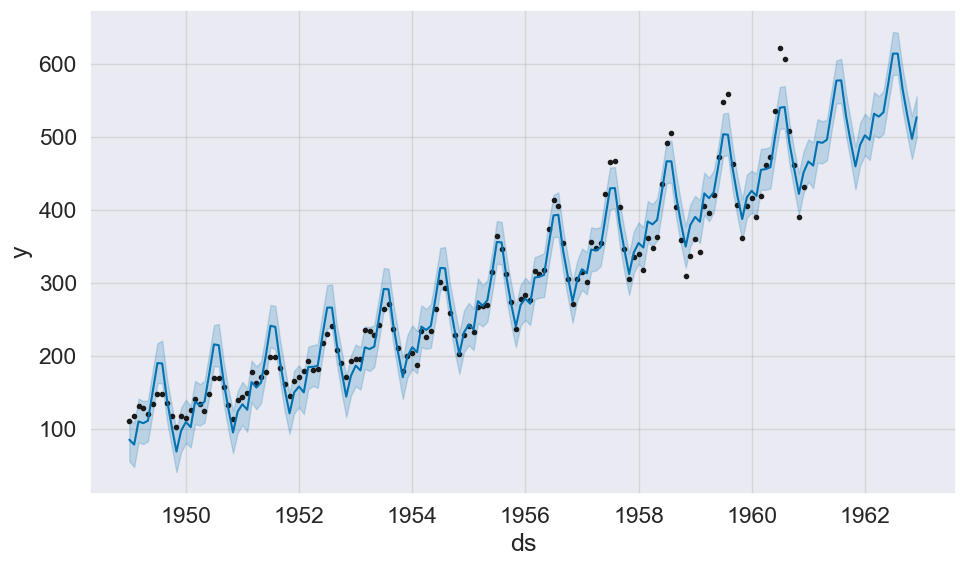

In [43]:
# DO NOT DELETE >>> RUN THIS CELL!

from prophet import Prophet

df = pd.read_csv('air-passengers.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)